In [23]:
# Importaos las librerias conlas que comenzaremos a trabajar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import json
import os
import time 

Partimos del notebook llamado Get_Companies_Data.ipynb, en este realizamos un web scrapping , de la información de la listas de las 2000 companias más grandes del mundo según Forbes (https://www.forbes.com/lists/global2000/?sh=1a8f96f55ac0), de froma que de 2000 empresas obtuvimos información de 1763, es decir un 88% de los datos

# EDA INICAL DE LAS 1763 EMPRESAS OBTENIDAS
Ante de comenzar el EDA debemos realizar

In [12]:
# Specify the path to your Excel file
excel_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\companies_base_1763.csv"
# Load the Excel file into a DataFrame
df_companie_data_1763 = pd.read_csv(excel_file_path)
# Display the DataFrame
df_companie_data_1763.head()

,company_name,stock_ticker,company_location,current_stock_price,description,Industry,Founded,Headquarters,Country/Territory,CEO and Chair,...,President & CEO,CEO & Co-Founder,Co-CEOs,CEO & Founder,Chairman and Co-CEO,Chairman and Chief Executive Officer,"Co-Founder, Co-CEO and Chairman",Charter President,President & Representative Director,CEO and Chairman
0,JPMorgan Chase,NYSE: JPM,"New York, New York",$180.90,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,2000,"New York, New York",United States,James Dimon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Saudi Arabian Oil Company (Saudi Aramco),NaN,"Dhahran, Saudi Arabia",NaN,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",1933,Dhahran,Saudi Arabia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ICBC,NaN,"Beijing, China",NaN,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,1984,Beijing,China,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,China Construction Bank,NaN,"Beijing, China",NaN,China Construction Bank Corp. engages in the p...,Banking,1954,Beijing,China,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agricultural Bank of China,NaN,"Beijing, China",NaN,Agricultural Bank of China engages in the prov...,Banking and Financial Services,1951,Beijing,China,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Aprovechamiento de las Columnas de Datos

Para aprovechar al máximo las 85 columnas de datos, es crucial crear un diccionario de datos. Este diccionario nos ayudará a comprender el significado de cada columna y facilitará la selección de las más relevantes para nuestro análisis.

## Pasos para la Creación del Diccionario

### 1. Agrupar las Columnas por Categorías

- **Información financiera**: Ingresos, costos, gastos, activos, pasivos, etc.
- **Ratios financieros**: Rentabilidad, liquidez, solvencia, etc.
- **Información de mercado**: Precio de las acciones, volumen de negociación, capitalización de mercado, etc.
- **Información de la empresa**: Sector, industria, ubicación, empleados, etc.

### 2. Definir las Características de cada Columna

- **Nombre de la columna**: Descripción clara y concisa del contenido.
- **Tipo de dato**: Numérico, categórico, fecha, etc.
- **Descripción**: Explicación detallada del significado de los valores en la columna.
- **Fuente**: Indicar la fuente de la información.
- **Ejemplo**: Mostrar un ejemplo de valor para ilustrar el contenido de la columna.

### 3. Eliminar las Columnas Irrelevantes

- **Columnas con valores nulos o inconsistentes**: Eliminar las que no aportan información útil.
- **Columnas duplicadas**: Seleccionar solo una de las columnas duplicadas.
- **Columnas irrelevantes para el análisis**: Eliminar las que no se ajustan a los objetivos del estudio.

In [14]:
#cargamso el diccionario de datos
# Specify the path to your Excel file
excel_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\external\\Diccionario de datos.xlsx"
# Load the Excel file into a DataFrame
data_dict = pd.read_excel(excel_file_path)
# Display the DataFrame
data_dict

,Nombre_Columna,Categoría,Descripción,Se conserva
0,company_name,Información Básica,Nombre de la compañía,Se tiene en cuenta
1,stock_ticker,Información Básica,Símbolo de stock exchage:ticker,Se tiene en cuenta
2,company_location,Información Básica,Ciudad,Borrar
3,current_stock_price,Datos del Mercado de Valores,Precio actual dela acción,Borrar
4,description,Información Básica,Descripción detallada de compañía,Se tiene en cuenta
...,...,...,...,...
80,Chairman and Chief Executive Officer,Información de los integrantes de la junta,se refieren a los roles de liderazgo dentro d...,Borrar
81,"Co-Founder, Co-CEO and Chairman",Información de los integrantes de la junta,se refieren a los roles de liderazgo dentro d...,Borrar
82,Charter President,Información de los integrantes de la junta,se refieren a los roles de liderazgo dentro d...,Borrar
83,President & Representative Director,Información de los integrantes de la junta,se refieren a los roles de liderazgo dentro d...,Borrar


In [15]:
# Basado en el diccionario de datos obtenemos las columas a conservar
columnas_a_conservar = []

# Recorrer la tabla de muestra
for i in range(len(data_dict)):
    # Si la columna se conserva, agregarla a la lista
    if data_dict.loc[i, "Se conserva"] == "Se tiene en cuenta":
        columnas_a_conservar.append(data_dict.loc[i, "Nombre_Columna"])

# Imprimir la lista de columnas
print(columnas_a_conservar)

['company_name', 'stock_ticker', 'description', 'Industry', 'Country/Territory', 'Employees', 'Revenue', 'Assets', 'Profits', '52 Week Range', 'Market Cap', 'P/E Ratio (ttm)', 'Forward P/E', 'Diluted EPS (ttm)', 'Price to Sales (ttm)', 'Price to Book Value (ttm)', 'Price to Tangible Book Value (ttm)', 'Total Enterprise Value to EBIT (ttm)', 'Total Enterprise Value to EBITDA (ttm)', 'Total Enterprise Value to Total Revenue (ttm)', 'Gross Margin (ttm)', 'Operating Margin (ttm)', 'Net Margin (ttm)', 'Return on Assets (ttm)', 'Return on Equity (ttm)', 'Revenue (ttm)', 'Revenue Per Share (ttm)', 'Revenue Growth (y/o/y)', 'EBITDA (ttm)', 'EBITDA Growth (y/o/y)', 'Diluted EPS Growth (y/o/y)', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Total Debt/Equity', 'Current Ratio', 'Consensus Recommendation', 'Consensus Price', 'Range of EPS', 'Consensus EPS', 'Consensus Revenue']


In [16]:
df_for_EDA = df_companie_data_1763[columnas_a_conservar]
df_for_EDA.head()

,company_name,stock_ticker,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits,52 Week Range,...,Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Consensus Recommendation,Consensus Price,Range of EPS,Consensus EPS,Consensus Revenue
0,JPMorgan Chase,NYSE: JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,"293,723",$179.9B,$3.7T,$41.8B,123.11 x 180.99,...,$1.42T,210.17,$731.37B,NaN,NaN,Outperform,192.32,14.60 to 17.00,15.92,$161.98B
1,Saudi Arabian Oil Company (Saudi Aramco),NaN,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,"70,000",$589.5B,$661B,$156.4B,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ICBC,NaN,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,"427,587",$216.8B,$6.1T,$52.5B,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,China Construction Bank,NaN,China Construction Bank Corp. engages in the p...,Banking,China,"352,588",$203.1B,$5T,$48.3B,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agricultural Bank of China,NaN,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,"459,000",$186.1B,$5.4T,$37.9B,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Paso 1 revisión de valores nulos

In [17]:
# Count null por columna
null_counts = df_for_EDA.isnull().sum()
# Imprimir los resultados
print(null_counts)

company_name                                        1
stock_ticker                                     1169
description                                         0
Industry                                            8
Country/Territory                                   1
Employees                                          58
Revenue                                             1
Assets                                              7
Profits                                             7
52 Week Range                                    1205
Market Cap                                       1207
P/E Ratio (ttm)                                  1265
Forward P/E                                      1230
Diluted EPS (ttm)                                1208
Price to Sales (ttm)                             1215
Price to Book Value (ttm)                        1244
Price to Tangible Book Value (ttm)               1390
Total Enterprise Value to EBIT (ttm)             1295
Total Enterprise Value to EB

## Paso 2: Imputación de Datos Nulos

**Al revisar el número de datos nulos**, se observa que se perdería más del 80% de la información para el análisis. Por lo tanto, **es necesario realizar la imputación de los datos**. Para esto, se realizarán dos pasos:

1. **Utilizar el DataFrame `df_for_EDA` y realizar una búsqueda manual de los `stock_ticker`**.
2. **Con los `stock_ticker` completos, se utilizarán para imputar los datos financieros faltantes usando la API de Yahoo Finance**.

In [18]:
# Specify the path to your Excel file
excel_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\raw\\df_for_EDA_full_tickers.xlsx"
# Load the Excel file into a DataFrame
df_comp = pd.read_excel(excel_file_path)
# Display the DataFrame
df_comp.head()

,company_name,stock_ticker,Ticker1,Ticker2,description,Industry,Country/Territory,Employees,Revenue,Assets,...,Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Consensus Recommendation,Consensus Price,Range of EPS,Consensus EPS,Consensus Revenue
0,JPMorgan Chase,NYSE: JPM,JPM,NaN,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,"293,723",$179.9B,$3.7T,...,$1.42T,21017.0,$731.37B,NaN,NaN,Outperform,19232.0,14.60 to 17.00,1592.0,$161.98B
1,Saudi Arabian Oil Company (Saudi Aramco),NaN,2222.SR,NaN,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,"70,000",$589.5B,$661B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ICBC,NaN,601398.SS,1398.HK,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,"427,587",$216.8B,$6.1T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,China Construction Bank,NaN,601939.SS,0939.HK,China Construction Bank Corp. engages in the p...,Banking,China,"352,588",$203.1B,$5T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agricultural Bank of China,NaN,601288.SS,1288.HK,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,"459,000",$186.1B,$5.4T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_info_companies = df_comp[["company_name","Ticker1","description","Industry","Country/Territory","Employees","Revenue","Assets","Profits"]]

df_info_companies.head()

,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,"293,723",$179.9B,$3.7T,$41.8B
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,"70,000",$589.5B,$661B,$156.4B
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,"427,587",$216.8B,$6.1T,$52.5B
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,"352,588",$203.1B,$5T,$48.3B
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,"459,000",$186.1B,$5.4T,$37.9B


In [20]:
# Filtrar las filas donde la columna 'Combinada' es NaN y guardar los nombres de las empresas en una lista
company_no_ticker_name = df_info_companies[pd.isna(df_info_companies['Ticker1'])]['company_name'].tolist()
# Eliminar las filas donde la columna 'Combinada' es NaN
df_info_companies = df_info_companies.dropna(subset=['Ticker1'])
# Restablecer el índice del DataFrame después de eliminar filas
df_info_companies = df_info_companies.reset_index(drop=True)

# Mostrar el DataFrame resultante
df_info_companies

,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,"293,723",$179.9B,$3.7T,$41.8B
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,"70,000",$589.5B,$661B,$156.4B
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,"427,587",$216.8B,$6.1T,$52.5B
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,"352,588",$203.1B,$5T,$48.3B
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,"459,000",$186.1B,$5.4T,$37.9B
...,...,...,...,...,...,...,...,...,...
1755,Alfa Laval,ALFA.ST,"Alfa Laval AB engages on energy optimization, ...",Capital Goods,Sweden,"19,002",$5.4B,$7.8B,$489.5M
1756,Gap,GPS.N,"Gap, Inc. operates as a global apparel retail ...","Clothing, Shoes, Sports Equipment",United States,"95,000",$15.6B,$11.4B,-$202M
1757,Yes Bank,YESBANK.NS,"YES BANK Ltd. is a holding company, which enga...",Banking,India,"21,136",$3.3B,$43.2B,$91.6M
1758,BEKB-BCBE,BEKB.SW,Berner Kantonalbank AG is a classical universa...,Banking,Switzerland,"1,146",$556M,$43B,$167.1M


In [31]:
# Lista de tickers de acciones para analizar
tickers = df_info_companies["Ticker1"].tolist() 

# Guarda en archivos json (Un para cada ticker), los resultados de cada consulta, en una carpeta llamada ticker_data

# Define the folder where the JSON files will be saved
ticker_data_folder = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\ticker_data_1760"

# Create the folder if it doesn't exist
!mkdir -p {ticker_data_folder}

Ya existe el subdirectorio o el archivo -p.
Error mientras se procesaba: -p.
Ya existe el subdirectorio o el archivo C:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\ticker_data_1760.
Error mientras se procesaba: C:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\ticker_data_1760.


In [24]:
# Esta función descarga la información de las acciones y las guarda en la carpeta "ticker_data_1760"
for ticker in tickers:
  # Ruta completa del archivo JSON
  json_file = os.path.join(ticker_data_folder, f"{ticker}.json")

  # Verifica si el archivo existe
  if not os.path.exists(json_file):
    # Obtiene la información del ticker
    accion = yf.Ticker(ticker)
    data = accion.info

    # Convierte la información a JSON
    json_data = json.dumps(data)

    # Escribe la información en el archivo
    with open(json_file, "w") as f:
      f.write(json_data)

  # Pausa de 2 segundos
  time.sleep(2)

KeyboardInterrupt: 

In [32]:
def crear_dataframe_tickers(ruta_archivo_ticker_data):
  """
  Crea un DataFrame a partir de archivos JSON del directorio ticker_data_1760.

  Args:
      ruta_archivo_ticker_data: Ruta al directorio que contiene los archivos JSON.

  Returns:
      Un DataFrame con las siguientes columnas:
          - Nombre del archivo
          - Sector
          - Symbol
          - Financial Currency
  """

  # Lista para almacenar los datos
  data = []

  # Recorrer los archivos JSON en el directorio
  for archivo in os.listdir(ruta_archivo_ticker_data):
    with open(os.path.join(ruta_archivo_ticker_data, archivo), 'r') as f:
      # Leer el archivo JSON
      ticker_data = json.load(f)

      # Extraer la información deseada
      nombre_archivo = archivo
      sector = ticker_data.get('sector', 'N/A')
      symbol = ticker_data.get('symbol', 'N/A')
      short_name = ticker_data.get('shortName', 'N/A')
      long_name= ticker_data.get('longName', 'N/A')
      financial_currency = ticker_data.get('financialCurrency', 'N/A')
      market_cap = ticker_data.get('marketCap', 'N/A')
      pe_ratio_ttm = ticker_data.get('trailingPE', 'N/A')
      forward_pe = ticker_data.get('forwardPE', 'N/A')
      diluted_eps_ttm = ticker_data.get('trailingEps', 'N/A')
      dividends_per_share = ticker_data.get('dividendRate', 'N/A')
      dividend_yield = ticker_data.get('dividendYield', 'N/A')
      ex_dividend_date = ticker_data.get('exDividendDate', 'N/A')
      price_to_sales_ttm = ticker_data.get('priceToSalesTrailing12Months', 'N/A')
      price_to_book_value_ttm = ticker_data.get('priceToBook', 'N/A')
      gross_margin_ttm = ticker_data.get('grossMargins', 'N/A')
      operating_margin_ttm = ticker_data.get('operatingMargins', 'N/A')
      net_margin_ttm = ticker_data.get('profitMargins', 'N/A')
      return_on_assets_ttm = ticker_data.get('returnOnAssets', 'N/A')
      return_on_equity_ttm = ticker_data.get('returnOnEquity', 'N/A')
      revenue_ttm = ticker_data.get('revenue', 'N/A')
      revenue_per_share_ttm = ticker_data.get('revenuePerShare', 'N/A')
      revenue_growth_yoy = ticker_data.get('revenueGrowth', 'N/A')
      ebitda_ttm = ticker_data.get('ebitda', 'N/A')
      total_cash = ticker_data.get('totalCash', 'N/A')
      total_cash_per_share = ticker_data.get('totalCashPerShare', 'N/A')
      total_debt = ticker_data.get('totalDebt', 'N/A')
      total_debt_equity = ticker_data.get('debtToEquity', 'N/A')
      current_ratio = ticker_data.get('currentRatio', 'N/A')
      range_of_price_targets = (ticker_data.get('targetLowPrice', 'N/A'), ticker_data.get('targetHighPrice', 'N/A'))

      # Agregar la información a la lista
      data.append({
          'Nombre del archivo': nombre_archivo,
          'Sector': sector,
          'Symbol': symbol,
          'Short Name':short_name,
          'Long Name':long_name,
          'Financial Currency': financial_currency,
          'Market Cap': market_cap,
          'P/E Ratio (ttm)': pe_ratio_ttm,
          'Forward P/E': forward_pe,
          'Diluted EPS (ttm)': diluted_eps_ttm,
          'Dividends Per Share': dividends_per_share,
          'Dividend Yield': dividend_yield ,
          'Ex-Dividend Date': ex_dividend_date,
          'Price to Sales (ttm)': price_to_sales_ttm ,
          'Price to Book Value (ttm)': price_to_book_value_ttm ,
          'Gross Margin (ttm)': gross_margin_ttm,
          'Operating Margin (ttm)': operating_margin_ttm,
          'Net Margin (ttm)': net_margin_ttm,
          'Return on Assets (ttm)': return_on_assets_ttm,
          'Return on Equity (ttm)': return_on_equity_ttm ,
          'Revenue (ttm)': revenue_ttm,
          'Revenue Per Share (ttm)': revenue_per_share_ttm,
          'Revenue Growth (y/o/y)': revenue_growth_yoy ,
          'EBITDA (ttm)': ebitda_ttm,
          'Total Cash': total_cash ,
          'Total Cash Per Share': total_cash_per_share,
          'Total Debt': total_debt ,
          'Total Debt/Equity': total_debt_equity,
          'Current Ratio': current_ratio,
          'Range of Price Targets': range_of_price_targets,
      })

  # Crear un DataFrame a partir de la lista
  df = pd.DataFrame(data)

  return df

In [41]:
df_datos_finanacieros = crear_dataframe_tickers(ticker_data_folder)

In [42]:
df_datos_finanacieros

,Nombre del archivo,Sector,Symbol,Short Name,Long Name,Financial Currency,Market Cap,P/E Ratio (ttm),Forward P/E,Diluted EPS (ttm),...,Revenue (ttm),Revenue Per Share (ttm),Revenue Growth (y/o/y),EBITDA (ttm),Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Range of Price Targets
0,000002.SZ.json,Real Estate,000002.SZ,CHINA VANKE CO,"China Vanke Co., Ltd.",CNY,102636716032,5.766871,42.727272,1.63,...,N/A,39.082,-0.316,41084788736,101244403712,8.538,347420033024,85.334,1.371,"(1.0, 2.57)"
1,000069.SZ.json,Consumer Cyclical,000069.SZ,SHENZHEN OVERSEAS,"Shenzhen Overseas Chinese Town Co.,Ltd.",CNY,23389882368,N/A,10.392858,-1.76,...,N/A,9.742,0.403,-1938736384,44277800960,5.509,141744406528,148.538,1.678,"(2.3, 6.03)"
2,000100.SZ.json,Technology,000100.SZ,TCL TECHNOLOGY GRO,TCL Technology Group Corporation,CNY,85632688128,57.0,9.702127,0.08,...,N/A,9.759,0.142,26715838464,45126356992,2.436,172931514368,119.123,1.186,"(4.3, 5.5)"
3,000270.KS.json,Consumer Cyclical,000270.KS,KIA CORP.,Kia Corporation,KRW,45692584198144,N/A,5.101147,N/A,...,N/A,252083.88,0.05,13964034441216,20661596585984,52148.51,4127631081472,8.866,1.459,"(97000.0, 160000.0)"
4,000333.SZ.json,Consumer Cyclical,000333.SZ,MIDEA GROUP CO LTD,"Midea Group Co., Ltd.",CNY,422025625600,12.614583,11.317757,4.8,...,N/A,52.722,0.092,38063738880,123658682368,17.985,84504707072,53.402,1.115,"(62.0, 103.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,Z74.SI.json,Communication Services,Z74.SI,Singtel,Singapore Telecommunications Limited,SGD,41753350144,13.315789,14.882353,0.19,...,N/A,0.864,-0.032,3206324992,1827100032,0.111,11262499840,41.39,N/A,"(2.8, 3.5)"
1256,ZBH.json,Healthcare,ZBH,"Zimmer Biomet Holdings, Inc.","Zimmer Biomet Holdings, Inc.",USD,26060023808,26.038933,14.639401,4.88,...,N/A,35.43,0.063,2448900096,415800000,2.027,6208000000,49.711,1.613,"(109.0, 160.0)"
1257,ZION.json,Financial Services,ZION,Zions Bancorporation N.A.,"Zions Bancorporation, National Association",USD,6141594624,9.565517,8.967672,4.35,...,N/A,20.19,-0.119,N/A,3608999936,24.36,5452000256,N/A,N/A,"(40.0, 51.0)"
1258,ZTS.json,Healthcare,ZTS,Zoetis Inc.,Zoetis Inc.,USD,77068181504,33.13386,25.97531,5.08,...,N/A,18.527,0.085,3488000000,2040999936,4.458,6838000128,137.007,3.358,"(200.0, 260.0)"


In [43]:
# Uniendo los DataFrames
df_datos_finales = pd.merge(df_info_companies, df_datos_finanacieros, left_on='Ticker1', right_on='Symbol', how='inner')

In [44]:
df_datos_finales

,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Nombre del archivo,...,Revenue (ttm),Revenue Per Share (ttm),Revenue Growth (y/o/y),EBITDA (ttm),Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Range of Price Targets
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,"293,723",$179.9B,$3.7T,$41.8B,JPM.json,...,N/A,49.687,0.111,N/A,1421310033920,493.447,731371995136,N/A,N/A,"(157.7, 221.0)"
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,"70,000",$589.5B,$661B,$156.4B,2222.SR.json,...,N/A,7.673,-0.057,951544971264,385298989056,1.592,290168012800,16.704,2.304,"(30.98, 37.94)"
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,"427,587",$216.8B,$6.1T,$52.5B,601398.SS.json,...,N/A,0.714,-0.021,N/A,5982225170432,16.785,2279343128576,N/A,N/A,"(3.57, 6.3)"
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,"352,588",$203.1B,$5T,$48.3B,601939.SS.json,...,N/A,2.715,0.035,N/A,2282935025664,9.131,3209271967744,N/A,N/A,"(5.6, 8.78)"
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,"459,000",$186.1B,$5.4T,$37.9B,601288.SS.json,...,N/A,1.673,0.036,N/A,6289219911680,17.97,3701659926528,N/A,N/A,"(2.36, 5.29)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Hengyi Petrochemical,600000.SS,"HengYi Petrochemical Co., Ltd. engages in the ...",Household & Personal Products,China,"15,637",$21.4B,$15.6B,-$259.2M,600000.SS.json,...,N/A,5.056,2.825,N/A,1331338018816,45.358,2057828040704,N/A,N/A,"(3.8, 9.0)"
1172,Orient Securities,600958.SS,"Orient Securities Co., Ltd. engages in the pro...",Diversified Financials,China,"8,391",$2.5B,$52.9B,$403.1M,600958.SS.json,...,N/A,1.864,-0.497,N/A,195054632960,22.957,156941549568,199.434,N/A,"(4.2, 12.38)"
1173,Tokyo Kiraboshi Financial Group,8604.T,"Tokyo Kiraboshi Financial Group, Inc. engages ...",Banking,Japan,"2,753",$843M,$49.9B,$176.2M,8604.T.json,...,N/A,476.592,0.017,N/A,29879921803264,9912.335,33418825957376,994.416,1.318,"(650.0, 950.0)"
1174,Jinshang Bank,601669.SS,"Jinshang Bank Co., Ltd. provides banking servi...",Banking,China,"4,402",$1.9B,$48.4B,$274M,601669.SS.json,...,N/A,32.007,0.065,47000317952,104569929728,6.07,453986746368,171.337,0.926,"(7.68, 10.0)"


In [45]:
csv_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\df_datos_financieros_final.csv"
# Save the DataFrame as a CSV file
df_datos_finales.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column
# Confirmation message
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to C:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\data\processed\df_datos_financieros_final.csv


In [46]:
# Specify the path to your Excel file
csv_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\df_datos_financieros_final.csv"
# Load the Excel file into a DataFrame
df_datos_finales = pd.read_csv(csv_file_path)
# Display the DataFrame
df_datos_finales.head()

,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Nombre del archivo,...,Revenue (ttm),Revenue Per Share (ttm),Revenue Growth (y/o/y),EBITDA (ttm),Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Range of Price Targets
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,"293,723",$179.9B,$3.7T,$41.8B,JPM.json,...,NaN,49.687,0.111,NaN,1.421310e+12,493.447,7.313720e+11,NaN,NaN,"(157.7, 221.0)"
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,"70,000",$589.5B,$661B,$156.4B,2222.SR.json,...,NaN,7.673,-0.057,9.515450e+11,3.852990e+11,1.592,2.901680e+11,16.704,2.304,"(30.98, 37.94)"
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,"427,587",$216.8B,$6.1T,$52.5B,601398.SS.json,...,NaN,0.714,-0.021,NaN,5.982225e+12,16.785,2.279343e+12,NaN,NaN,"(3.57, 6.3)"
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,"352,588",$203.1B,$5T,$48.3B,601939.SS.json,...,NaN,2.715,0.035,NaN,2.282935e+12,9.131,3.209272e+12,NaN,NaN,"(5.6, 8.78)"
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,"459,000",$186.1B,$5.4T,$37.9B,601288.SS.json,...,NaN,1.673,0.036,NaN,6.289220e+12,17.970,3.701660e+12,NaN,NaN,"(2.36, 5.29)"


In [ ]:
df_datos_finales['Employees'] = df_datos_finales['Employees'].str.replace(',', '').astype(float)

In [ ]:
df_datos_finales.dtypes

In [ ]:
print(df_datos_finales.columns)

## Revision de filas

In [ ]:
import numpy as np
def limpiar_datos_nulos_y_na(df):
    # Reemplaza 'N/A' con NaN para asegurarse de que sean tratados como valores nulos
    df.replace('N/A', np.nan, inplace=True)
    
    # Calcula el número total de columnas
    total_columnas = df.shape[1]
    
    # Calcula el límite de datos nulos permitidos por fila (20% del total de columnas)
    limite_nulos = total_columnas * 0.2
    
    # Calcula el número de datos nulos por fila
    nulos_por_fila = df.isnull().sum(axis=1)
    
    # Filtra las filas que tienen más del 20% de datos nulos
    filas_a_mantener = nulos_por_fila <= limite_nulos
    
    # Retorna el DataFrame filtrado
    return df[filas_a_mantener]

In [ ]:
# Aplica la función al DataFrame
df_datos_finales_limpio = limpiar_datos_nulos_y_na(df_datos_finales)


In [ ]:
df_datos_finales_limpio 

## Revisión por columnas

In [ ]:
def limpiar_columnas_con_datos_nulos_y_na(df):
    # Reemplaza 'N/A' con NaN para asegurarse de que sean tratados como valores nulos
    df.replace('N/A', np.nan, inplace=True)
    
    # Calcula el número total de filas
    total_filas = df.shape[0]
    
    # Calcula el límite de datos nulos permitidos por columna (20% del total de filas)
    limite_nulos = total_filas * 0.2
    
    # Calcula el número de datos nulos por columna
    nulos_por_columna = df.isnull().sum()
    
    # Encuentra las columnas que tienen menos del 20% de datos nulos
    columnas_a_mantener = nulos_por_columna <= limite_nulos
    
    # Filtra el DataFrame para mantener solo esas columnas
    df_filtrado = df.loc[:, columnas_a_mantener]
    
    return df_filtrado


In [ ]:
# Aplica la función al DataFrame
df_datos_finales_limpio = limpiar_columnas_con_datos_nulos_y_na(df_datos_finales_limpio)

In [ ]:
df_datos_finales_limpio 

In [ ]:
print(df_datos_finales_limpio.columns)

## manejo de tipos de datos, teneindeo en cuanta homologación de moneda, dejar todo en dolares

In [ ]:
def convert_to_billions(value: str) -> float:
    value = value.replace('$', '').strip()
    if 'T' in value:
        # Si el valor está en trillones, multiplica por 1,000 para convertir a billones
        return float(value.replace('T', '')) * 1000
    elif 'B' in value:
        # Si el valor está en billones, simplemente quita la 'B' y convierte a float
        return float(value.replace('B', ''))
    elif 'M' in value:
        # Si el valor está en millones, divide entre 1,000 para convertir a billones
        return float(value.replace('M', '')) / 1000
    else:
        # Asume que el valor ya está en billones si no tiene especificador
        return float(value)

In [ ]:
# Aplica la función convert_to_billions a las columnas específicas
for columna in ['Revenue', 'Assets', 'Profits']:
    # Comprueba primero si la columna existe en el DataFrame para evitar errores
    if columna in df_datos_finales_limpio.columns:
        df_datos_finales_limpio[columna] = df_datos_finales_limpio[columna].apply(lambda x: convert_to_billions(x) if pd.notnull(x) else np.nan)

df_datos_finales_limpio

In [ ]:
# Define las columnas a eliminar
columnas_a_eliminar = ['Nombre del archivo', 'Symbol', 'Short Name', 'Long Name', 'Range of Price Targets', 'Ex-Dividend Date']

# Realiza el drop de las columnas especificadas
df_datos_finales_limpio = df_datos_finales_limpio.drop(columns=columnas_a_eliminar, errors='ignore')
df_datos_finales_limpio.head()

In [ ]:
columnas_a_convertir = [
    'Market Cap', 'P/E Ratio (ttm)', 'Forward P/E', 'Diluted EPS (ttm)',
    'Dividends Per Share', 'Dividend Yield', 'Price to Sales (ttm)',
    'Price to Book Value (ttm)', 'Gross Margin (ttm)', 'Operating Margin (ttm)',
    'Net Margin (ttm)', 'Return on Assets (ttm)', 'Return on Equity (ttm)',
    'Revenue Per Share (ttm)', 'Revenue Growth (y/o/y)', 'EBITDA (ttm)',
    'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Total Debt/Equity',
    'Current Ratio', 'Employees'
]

# Convierte cada columna especificada a tipo float, usando errors='coerce' para convertir valores no numéricos a NaN
for columna in columnas_a_convertir:
    if columna in df_datos_finales_limpio.columns:
        df_datos_finales_limpio[columna] = pd.to_numeric(df_datos_finales_limpio[columna], errors='coerce')

In [ ]:
print(df_datos_finales_limpio.columns)
print(df_datos_finales_limpio.dtypes)

Vamos a relazar el analis descrioptivo delos datos 

In [ ]:
# Obtén estadísticas descriptivas
estadisticas_descriptivas = df_datos_finales_limpio.describe()
estadisticas_descriptivas

## MANEJO DE MONDES Y HOLOGACIÓN TODO A BILLONES DE DOLARES

Esto se hara para las columnas Market Cap, EBITDA (ttm), Total Cash, Total Debt

In [ ]:
# Obtener los valores únicos
monedas_unicas = df_datos_finales_limpio['Financial Currency'].unique()

# Mostrar los valores únicos
monedas_unicas

In [ ]:
def convert_to_billions_usd(value, currency):

    rates = { "USD": 1.0,"SAR": 0.265,"CNY": 0.147,"JPY": 0.0091,"KRW": 0.00076,
    "EUR": 1.08,"CAD": 0.78,"TWD": 0.032,"BRL": 0.18,"CHF": 1.03,"AUD": 0.73,
    "GBP": 1.24,"INR": 0.013,"SGD": 0.71,"SEK": 0.10,"DKK": 0.14,"THB": 0.029,
    "PLN": 0.23,"COP": 0.00023,"MXN": 0.052,"NOK": 0.10,"CZK": 0.042,"HKD": 0.13,
    "KWD": 3.29,"TRY": 0.056,"CLP": 0.0012,"ILS": 0.28,"PEN": 0.27,"QAR": 0.27,
    }

    # Asegurar que el valor está en miles y convertir a la moneda base (USD)
    if currency in rates:
        usd_value = (value * 1000) * rates[currency]  # Convertir de miles y moneda a USD
    else:
        print(f"La moneda '{currency}' no está en el diccionario de tasas de cambio.")
        return None

        # Convertir el valor de USD a billones de USD
    usd_value_in_billions = usd_value / 10**12
    
    return usd_value_in_billions


In [ ]:
# Aplicar la función a la columna 'Market Cap', 'EBITDA (ttm)', 'Total Cash', 'Total Debt'
df_datos_finales_limpio['Market Cap USD'] = df_datos_finales_limpio.apply(lambda x: convert_to_billions_usd(x['Market Cap'], x['Financial Currency']), axis=1)
df_datos_finales_limpio['EBITDA (ttm) USD'] = df_datos_finales_limpio.apply(lambda x: convert_to_billions_usd(x['EBITDA (ttm)'], x['Financial Currency']), axis=1)
df_datos_finales_limpio['Total Cash USD'] = df_datos_finales_limpio.apply(lambda x: convert_to_billions_usd(x['Total Cash'], x['Financial Currency']), axis=1)
df_datos_finales_limpio['Total Debt USD'] = df_datos_finales_limpio.apply(lambda x: convert_to_billions_usd(x['Total Debt'], x['Financial Currency']), axis=1)

In [ ]:
# Drop las columnas que ya no necesitamos 'Market Cap', 'EBITDA (ttm)', 'Total Cash', 'Total Debt' 
df_datos_finales_limpio.drop(['Market Cap', 'EBITDA (ttm)', 'Total Cash', 'Total Debt'], axis=1, inplace=True)

# Muestra las primeras filas para verificar la conversión
df_datos_finales_limpio.head(10)

In [ ]:
# Supongamos que df_datos_finales_limpio es tu DataFrame
# Identifica columnas numéricas
columnas_numericas = df_datos_finales_limpio.select_dtypes(include=[np.number]).columns.tolist()

# Detección de outliers usando IQR
for columna in columnas_numericas:
    Q1 = df_datos_finales_limpio[columna].quantile(0.25)
    Q3 = df_datos_finales_limpio[columna].quantile(0.75)
    IQR = Q3 - Q1
    filtro = ~((df_datos_finales_limpio[columna] < (Q1 - 1.5 * IQR)) | (df_datos_finales_limpio[columna] > (Q3 + 1.5 * IQR)))
    print(f"Outliers en {columna}: {~filtro.sum()}")  # Cuenta el número de outliers por columna

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de seaborn
sns.set(style="whitegrid")

# Histogramas para las columnas numéricas
for columna in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_datos_finales_limpio[columna], kde=True)
    plt.title(f'Histograma de {columna}')
    plt.show()

# Boxplots para las columnas numéricas
for columna in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_datos_finales_limpio[columna])
    plt.title(f'Boxplot de {columna}')
    plt.show()

In [ ]:
# Frecuencia de categorías en 'Industry'
print(df_datos_finales_limpio['Industry'].value_counts())

# Frecuencia de categorías en 'Country/Territory'
print(df_datos_finales_limpio['Country/Territory'].value_counts())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de tener un tamaño de muestra manejable para visualización o considera agrupar categorías menos frecuentes
plt.figure(figsize=(12, 8))
sns.countplot(y='Industry', data=df_datos_finales_limpio, order = df_datos_finales_limpio['Industry'].value_counts().index)
plt.title('Frecuencia de Industrias')
plt.xlabel('Frecuencia')
plt.ylabel('Industria')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Country/Territory', data=df_datos_finales_limpio, order = df_datos_finales_limpio['Country/Territory'].value_counts().index)
plt.title('Frecuencia de Países/Territorios')
plt.xlabel('Frecuencia')
plt.ylabel('País/Territorio')
plt.show()

In [ ]:
import re

def extract_segments(description):
    match = re.search(r'segments:(.*?)[.]', description, re.IGNORECASE)
    if match:
        return match.group(1).strip()
    return None  # Retorna None si no hay coincidencia

In [ ]:
# Aplica la función a la columna 'description' y crea la nueva columna 'business_segments'
df_datos_finales_limpio['business_segments'] = df_datos_finales_limpio['description'].apply(extract_segments)
df_datos_finales_limpio.head()

In [ ]:
# Drop las columnas que ya no necesitamos 'Market Cap', 'EBITDA (ttm)', 'Total Cash', 'Total Debt' 
df_datos_finales_limpio.drop(['description', 'Financial Currency'], axis=1, inplace=True)

df_datos_finales_limpio

In [ ]:
# Count null por columna
null_counts = df_datos_finales_limpio.isnull().sum()
# Imprimir los resultados
print(null_counts)

In [ ]:
csv_file_path = "df_segmentos.csv"
# Save the DataFrame as a CSV file
df_datos_finales_limpio.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column
# Confirmation message
print(f"DataFrame has been saved to {csv_file_path}")

In [3]:
# Specify the path to your Excel file
excel_file_path = "df_segmentos.csv"
# Load the Excel file into a DataFrame
df_datos_segmentos = pd.read_csv(excel_file_path)
# Display the DataFrame
df_datos_segmentos.head()

,company_name,Ticker1,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,P/E Ratio (ttm),...,Revenue Per Share (ttm),Revenue Growth (y/o/y),Total Cash Per Share,Total Debt/Equity,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD,business_segments
0,JPMorgan Chase,JPM,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,12.257389,...,49.687,0.111,493.447,NaN,NaN,573.366403,NaN,1421.310034,731.371995,"Consumer and Community Banking, Corporate and ..."
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,16.684492,...,7.673,-0.057,1.592,16.704,2.304,2000.500446,252.159417,102.104232,76.894523,"Upstream, Downstream, and Corporate"
2,ICBC,601398.SS,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,5.381443,...,0.714,-0.021,16.785,NaN,NaN,253.621212,NaN,879.387100,335.063440,"Corporate Banking, Personal Banking, Treasury ..."
3,China Construction Bank,601939.SS,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,5.160306,...,2.715,0.035,9.131,NaN,NaN,167.292783,NaN,335.591449,471.762979,"Corporate Banking, Personal Banking, Treasury,..."
4,Agricultural Bank of China,601288.SS,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,5.830986,...,1.673,0.036,17.970,NaN,NaN,208.051584,NaN,924.515327,544.144009,"Corporate Banking, Personal Banking, Treasury ..."


### Analisis de los segmentos

In [4]:
# Contar y listar las categorías únicas en la columna 'business_segments'
categorias_unicas = df_datos_segmentos['business_segments'].unique()
num_categorias = len(categorias_unicas)

categorias_unicas, num_categorias

(array(['Consumer and Community Banking, Corporate and Investment Bank, Commercial Banking and Asset and Wealth Management',
        'Upstream, Downstream, and Corporate',
        'Corporate Banking, Personal Banking, Treasury Operations, and Others',
        'Corporate Banking, Personal Banking, Treasury, and Others',
        'Corporate Banking, Personal Banking, Treasury Operations and Others & Unallocated',
        'Consumer Banking, Global Wealth and Investment Management, Global Banking, Global Markets, and All Other',
        nan, 'Upstream, Downstream and Chemical',
        'Productivity and Business Processes; Intelligent Cloud; and More Personal Computing',
        'Americas, Europe, Greater China, Japan, and Rest of Asia Pacific',
        'Integrated Gas, Upstream, Downstream, and Corporate',
        'Corporate Banking, Personal Banking, Treasury Operations, Investment Banking, Insurance, and Others',
        'Automotive, Financial Services, and All Other',
        'UnitedHea

El dataset contiene un total de 715 categorías únicas en la columna business_segments. Este es un número bastante alto, lo que podría complicar la construcción de modelos predictivos eficientes debido a la gran variedad de etiquetas.

Dada la cantidad de categorías, podría ser conveniente considerar la consolidación de algunas de ellas para simplificar el modelo y posiblemente mejorar su desempeño. Podríamos agrupar segmentos similares o aquellos que tienen poca representación en el dataset. Esta agrupación puede basarse en similitudes en las actividades de negocio o en la frecuencia de aparición en el dataset.

El siguiente paso será revisar la distribución de estas categorías para ver cuán desbalanceadas están. Esto nos ayudará a decidir si necesitamos aplicar técnicas como el agrupamiento de categorías menos frecuentes. Vamos a contar cuántas veces aparece cada categoría en el dataset.

In [5]:
# Contar la frecuencia de cada categoría en la columna 'business_segments'
frecuencia_categorias = df_datos_segmentos['business_segments'].value_counts()

frecuencia_categorias

business_segments
U                                                                                                             13
Sunbelt, A-Plant, Sunbelt Canada, and Corporate Items                                                          1
Exploration and Production; Refining and Marketing; Gas and Power; and Others                                  1
Personal Care, Consumer Tissue, Professional Hygiene, and Other Operations                                     1
PRC Power, Singapore, and All Other                                                                            1
                                                                                                              ..
Consolidated Edison Company of New York, Inc                                                                   1
Switzerland, Germany, France, International, Asset Managers, and Others                                        1
Gas Distribution, Electricity Distribution, Gas, Electricity, and Rest        

In [6]:
# Conteo de segmentos únicos
from collections import Counter

# Asegurarse de que todos los valores son cadenas antes de intentar dividirlos
df_datos_segmentos['segment_list'] = df_datos_segmentos['business_segments'].apply(lambda x: x.split(', ') if pd.notna(x) else [])

# Extraer todos los segmentos en una lista única
all_segments = [segment for sublist in df_datos_segmentos['segment_list'] for segment in sublist]

# Obtener segmentos únicos y realizar el conteo
unique_segments = set(all_segments)
segment_counts = Counter(all_segments)

# Convertir el conteo a DataFrame para una mejor visualización
segment_counts_df = pd.DataFrame(list(segment_counts.items()), columns=['Segment', 'Count']).sort_values(by='Count', ascending=False)

print("Número de segmentos únicos:", len(unique_segments))
print(segment_counts_df)

Número de segmentos únicos: 1897
                             Segment  Count
9                         and Others     83
36                         and Other     38
83                                 U     21
404                           Retail     17
262                   Retail Banking     17
...                              ...    ...
701                   and Heineken N      1
700   Middle East and Eastern Europe      1
698               and Prepared Foods      1
697                             Pork      1
1896                 Mining Services      1

[1897 rows x 2 columns]


Hay un total de 1897 segmentos únicos en la columna 'business_segments'.
Algunos segmentos parecen tener nombres muy específicos o contener descripciones adicionales como "and Others" o "and Other".
Aquí están los cinco segmentos más comunes y su frecuencia de aparición, vamos a realiza r una hologación de lso segmoto apra reducir su numero

In [7]:
# Cargar el archivo de homologación de segmentos
df_homologacion_segmentos = pd.read_excel('Homologación Segmetnos.xlsx')

# Mostrar las primeras filas del archivo de homologación para entender su estructura
df_homologacion_segmentos.head()

,company_name,business_segments_homologation
0,JPMorgan Chase,"Investment Banking, Asset Management, Commerci..."
1,Saudi Arabian Oil Company (Saudi Aramco),"Upstream Oil and Gas, Downstream Oil and Gas, ..."
2,ICBC,"Corporate Banking, Personal Banking, Asset Man..."
3,China Construction Bank,"Corporate Banking, Personal Banking, Investmen..."
4,Agricultural Bank of China,"Corporate Banking, Personal Banking, Agricultu..."


In [18]:
# Realizar el merge con el DataFrame original
df_datos_segmentos_homologados = pd.merge(df_datos_segmentos, df_homologacion_segmentos, on="company_name", how="left")

# Mostrar las primeras filas del DataFrame resultante para verificar el merge
df_datos_segmentos_homologados.head()

,company_name,Ticker1,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,P/E Ratio (ttm),...,Total Cash Per Share,Total Debt/Equity,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD,business_segments,segment_list,business_segments_homologation
0,JPMorgan Chase,JPM,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,12.257389,...,493.447,NaN,NaN,573.366403,NaN,1421.310034,731.371995,"Consumer and Community Banking, Corporate and ...","[Consumer and Community Banking, Corporate and...","Investment Banking, Asset Management, Commerci..."
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,16.684492,...,1.592,16.704,2.304,2000.500446,252.159417,102.104232,76.894523,"Upstream, Downstream, and Corporate","[Upstream, Downstream, and Corporate]","Upstream Oil and Gas, Downstream Oil and Gas, ..."
2,ICBC,601398.SS,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,5.381443,...,16.785,NaN,NaN,253.621212,NaN,879.387100,335.063440,"Corporate Banking, Personal Banking, Treasury ...","[Corporate Banking, Personal Banking, Treasury...","Corporate Banking, Personal Banking, Asset Man..."
3,China Construction Bank,601939.SS,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,5.160306,...,9.131,NaN,NaN,167.292783,NaN,335.591449,471.762979,"Corporate Banking, Personal Banking, Treasury,...","[Corporate Banking, Personal Banking, Treasury...","Corporate Banking, Personal Banking, Investmen..."
4,Agricultural Bank of China,601288.SS,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,5.830986,...,17.970,NaN,NaN,208.051584,NaN,924.515327,544.144009,"Corporate Banking, Personal Banking, Treasury ...","[Corporate Banking, Personal Banking, Treasury...","Corporate Banking, Personal Banking, Agricultu..."


In [19]:
# Eliminar las columnas no deseadas
df_datos_segmentos_homologados = df_datos_segmentos_homologados.drop(columns=['business_segments'], errors='ignore')

# Dividir los segmentos y extraerlos como una lista única
segmentos_homologados_split = df_datos_segmentos_homologados['business_segments_homologation'].str.split(', ').explode()

# Conteo de segmentos únicos
segmentos_homologados_unicos = segmentos_homologados_split.unique()
conteo_segmentos_homologados = segmentos_homologados_split.value_counts()

(segmentos_homologados_unicos, conteo_segmentos_homologados)

(array(['Investment Banking', 'Asset Management', 'Commercial Banking',
        ..., 'Supporting Infrastructure', 'New Energy Initiatives',
        'Scrap Recycling'], dtype=object),
 business_segments_homologation
 Asset Management               133
 Renewable Energy               108
 Investment Banking             101
 Digital Banking                 88
 Retail Banking                  88
                               ... 
 Home Office Products             1
 Consumer Electronics Retail      1
 Digital Factory Automation       1
 Static Eliminators               1
 Scrap Recycling                  1
 Name: count, Length: 2514, dtype: int64)

In [22]:
csv_file_path = "datos_finales.csv"
# Save the DataFrame as a CSV file
df_datos_segmentos_homologados.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column
# Confirmation message
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to datos_finales.csv


In [44]:
# Specify the path to your Excel file
excel_file_path = "datos_finales.csv"
# Load the Excel file into a DataFrame
df = pd.read_csv(excel_file_path)
# Display the DataFrame
df.head()

,company_name,Ticker1,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,P/E Ratio (ttm),...,Revenue Growth (y/o/y),Total Cash Per Share,Total Debt/Equity,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD,segment_list,business_segments_homologation
0,JPMorgan Chase,JPM,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,12.257389,...,0.111,493.447,NaN,NaN,573.366403,NaN,1421.310034,731.371995,"['Consumer and Community Banking', 'Corporate ...","Investment Banking, Asset Management, Commerci..."
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,16.684492,...,-0.057,1.592,16.704,2.304,2000.500446,252.159417,102.104232,76.894523,"['Upstream', 'Downstream', 'and Corporate']","Upstream Oil and Gas, Downstream Oil and Gas, ..."
2,ICBC,601398.SS,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,5.381443,...,-0.021,16.785,NaN,NaN,253.621212,NaN,879.387100,335.063440,"['Corporate Banking', 'Personal Banking', 'Tre...","Corporate Banking, Personal Banking, Asset Man..."
3,China Construction Bank,601939.SS,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,5.160306,...,0.035,9.131,NaN,NaN,167.292783,NaN,335.591449,471.762979,"['Corporate Banking', 'Personal Banking', 'Tre...","Corporate Banking, Personal Banking, Investmen..."
4,Agricultural Bank of China,601288.SS,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,5.830986,...,0.036,17.970,NaN,NaN,208.051584,NaN,924.515327,544.144009,"['Corporate Banking', 'Personal Banking', 'Tre...","Corporate Banking, Personal Banking, Agricultu..."


labels
Asset Management               133
Renewable Energy               108
Investment Banking             101
Digital Banking                 88
Retail Banking                  88
                              ... 
Home Office Products             1
Consumer Electronics Retail      1
Digital Factory Automation       1
Static Eliminators               1
Scrap Recycling                  1
Name: count, Length: 2514, dtype: int64


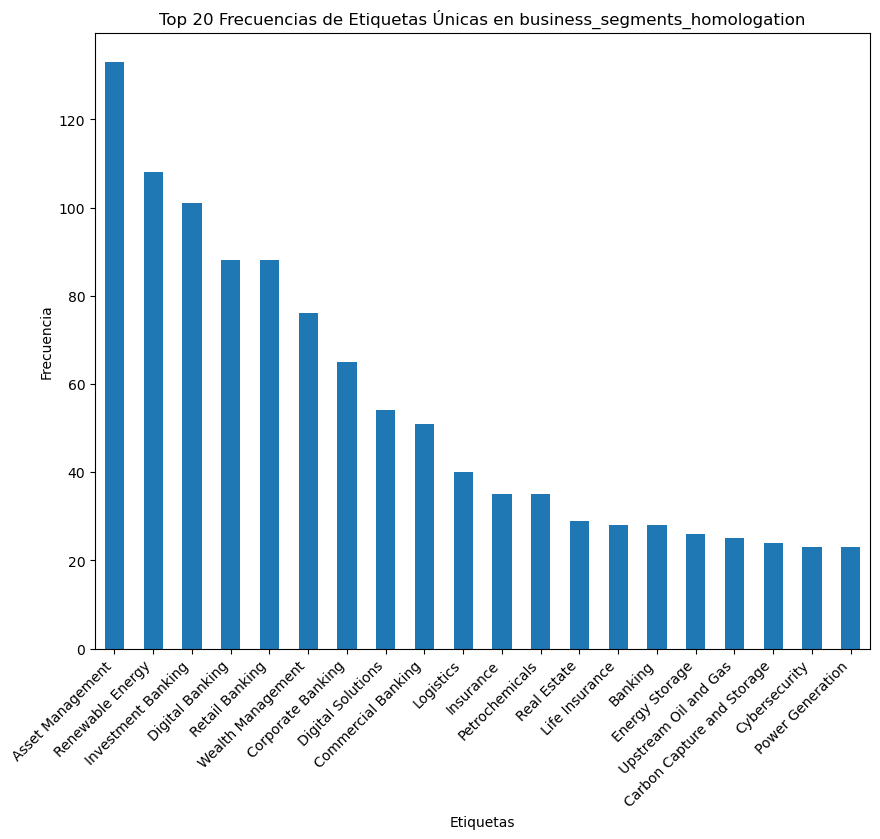

In [38]:
# Asegurarse que la columna de etiquetas sea de tipo string
df['business_segments_homologation'] = df['business_segments_homologation'].astype(str)

# Separar las etiquetas y expandirlas en una lista
df['labels'] = df['business_segments_homologation'].apply(lambda x: x.split(', '))

# Crear una serie con todas las etiquetas
all_labels = df['labels'].explode()

# Contar la frecuencia de cada etiqueta
label_counts = all_labels.value_counts()

# Mostrar la tabla de frecuencias ordenada
print(label_counts)

# Graficar las 20 etiquetas más frecuentes
plt.figure(figsize=(10, 8))
label_counts.head(20).plot(kind='bar')
plt.title('Top 20 Frecuencias de Etiquetas Únicas en business_segments_homologation')
plt.xlabel('Etiquetas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

Construir un modelo de clasificación multi-etiqueta implica varios enfoques teóricos y metodológicos. Vamos a revisar algunas de las principales técnicas disponibles y cómo podrían aplicarse a tu conjunto de datos:

1. Transformación del Problema
Estas técnicas transforman el problema de clasificación multi-etiqueta en uno o más problemas de clasificación más simples:

- Binary Relevance (BR): Este método trata cada etiqueta como un problema de clasificación binario independiente. Construye un modelo separado para cada etiqueta, pero no tiene en cuenta las correlaciones entre etiquetas.
- Classifier Chains (CC): En este enfoque, los clasificadores se encadenan. Un clasificador se construye para cada etiqueta, y además de las características de entrada, cada clasificador también recibe como entrada las predicciones de las etiquetas anteriores en la cadena. Esto permite que el método tenga en cuenta las correlaciones entre etiquetas.
- Label Powerset (LP): Este método considera cada conjunto único de etiquetas como una clase en un problema de clasificación multiclase. Es efectivo para tener en cuenta las correlaciones entre etiquetas, pero puede ser computacionalmente intensivo si el número de combinaciones de etiquetas es muy grande.

2. Adaptación del Algoritmo
Estos métodos modifican algoritmos existentes para manejar directamente múltiples etiquetas:

- Random Forests para multi-etiqueta: Algunas implementaciones de Random Forest están adaptadas para manejar clasificación multi-etiqueta de manera nativa.
- Redes Neuronales Multi-etiqueta: Las redes neuronales se pueden adaptar para producir múltiples salidas, una por etiqueta, y suelen ser eficaces en tareas complejas con grandes volúmenes de datos.

3. Enfoques Basados en Aprendizaje Profundo
Estos enfoques utilizan modelos de aprendizaje profundo para capturar relaciones complejas entre características y múltiples etiquetas:

- Convolutional Neural Networks (CNNs): Aunque son más conocidas por su uso en procesamiento de imágenes, pueden adaptarse para clasificación multi-etiqueta al ajustar la capa de salida para predecir múltiples etiquetas.
- Recurrent Neural Networks (RNNs): Útiles para datos secuenciales, también se pueden adaptar para tareas multi-etiqueta.
- Transformers: Muy eficientes en capturar dependencias a largo plazo en los datos, pueden ser adaptados para clasificación multi-etiqueta mediante la adecuación de sus capas de salida.

Para manejar la gran cantidad de categorías en problema de clasificación multietiqueta, una opción es agrupar segmentos similares para reducir la dimensionalidad y simplificar el problema. Aquí hay dos enfoques que podrías considerar:

Clustering de Texto para Agrupar Segmentos Similares:
Podriamos utilizar técnicas de procesamiento de lenguaje natural (NLP) para convertir los segmentos de negocio en vectores numéricos utilizando métodos como TF-IDF o embeddings de palabras (Word2Vec, GloVe, etc.).
Luego, aplicar un algoritmo de clustering como K-Means o agrupamiento jerárquico para encontrar grupos de segmentos similares. Estos clusters pueden ser tratados como nuevas etiquetas en tu clasificador.

Reducción de Dimensionalidad con LDA o PCA:
Otra opción es utilizar técnicas de reducción de dimensionalidad como Análisis de Componentes Principales (PCA) o Análisis Discriminante Lineal (LDA) sobre vectores de características de los segmentos.

Estas técnicas buscan reducir el número de variables necesarias para describir cada segmento, lo que puede ayudar a simplificar el modelo de clasificación.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, hamming_loss
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Paso 0: Preprocesamiento y Vectorización de los Textos
# Aplicamos el mismo preprocesamiento usado previamente
def preprocess_text(text):
    text = text.lower()  # Convertir el texto a minúsculas
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])  # Remover puntuación y números
    return text

df_datos_segmentos_homologados['preprocessed'] = df_datos_segmentos_homologados['business_segments_homologation'].apply(preprocess_text)
vectorizer = TfidfVectorizer(max_features=1000)  # Limitamos a 1000 las palabras más relevantes para simplificar
tfidf_matrix = vectorizer.fit_transform(df_datos_segmentos_homologados['preprocessed'])

# Paso 1: Preparación de las Etiquetas
mlb_original = MultiLabelBinarizer()
labels = df_datos_segmentos_homologados['business_segments_homologation'].apply(lambda x: x.split(', '))
labels_encoded = mlb_original.fit_transform(labels)

# Paso 2: División de los Datos
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    tfidf_matrix, labels_encoded, test_size=0.2, random_state=42)

# Paso 3: Construcción del Modelo BR
br_classifier = MultiOutputClassifier(RandomForestClassifier(random_state=42))

# Paso 4: Entrenamiento del Modelo
br_classifier.fit(X_train_original, y_train_original)

# Paso 5: Evaluación del Modelo
y_pred_original = br_classifier.predict(X_test_original)
accuracy_original = accuracy_score(y_test_original, y_pred_original)
f1_original = f1_score(y_test_original, y_pred_original, average='micro')
hamming_original = hamming_loss(y_test_original, y_pred_original)

(accuracy_original, f1_original, hamming_original)

(0.1318181818181818, 0.35735735735735735, 0.0015476965357633615)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# Preprocesamiento de texto
def preprocess_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Remover puntuación y números (opcional dependiendo del contexto)
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

# Aplicar la función de preprocesamiento a cada segmento
df_datos_segmentos_homologados['business_segments_homologation'] = df_datos_segmentos_homologados['business_segments_homologation'].astype(str)
segmentos_preprocesados = df_datos_segmentos_homologados['business_segments_homologation'].apply(preprocess_text)

# Verificación del preprocesamiento
print(segmentos_preprocesados.head())

0    investment banking asset management commercial...
1    upstream oil and gas downstream oil and gas pe...
2    corporate banking personal banking asset manag...
3    corporate banking personal banking investment ...
4    corporate banking personal banking agricultura...
Name: business_segments_homologation, dtype: object


In [41]:
# Vectorización de los segmentos usando TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limitamos a 1000 las palabras más relevantes para simplificar
tfidf_matrix = vectorizer.fit_transform(segmentos_preprocesados)

# Aplicación del algoritmo K-Means para clustering
# Estableceremos un número inicial de clusters; esto puede ajustarse según sea necesario
num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Agregar la información de los clusters al DataFrame original
df_datos_segmentos_homologados['cluster'] = clusters

# Visualizar la distribución de los clusters y algunos ejemplos
cluster_counts = pd.Series(clusters).value_counts()
cluster_examples = df_datos_segmentos_homologados[['business_segments_homologation', 'cluster']].head()

(cluster_counts, cluster_examples)

c:\Users\sjess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(28    159
 29     70
 13     69
 15     55
 5      49
 20     48
 27     45
 17     40
 8      39
 24     38
 25     37
 0      36
 3      35
 19     32
 2      32
 6      31
 1      29
 16     26
 18     26
 4      25
 12     24
 14     21
 23     20
 22     19
 11     19
 21     18
 10     17
 26     14
 9      13
 7      13
 Name: count, dtype: int64,
                       business_segments_homologation  cluster
 0  Investment Banking, Asset Management, Commerci...        5
 1  Upstream Oil and Gas, Downstream Oil and Gas, ...        8
 2  Corporate Banking, Personal Banking, Asset Man...       29
 3  Corporate Banking, Personal Banking, Investmen...       29
 4  Corporate Banking, Personal Banking, Agricultu...       29)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, hamming_loss

# Paso 1: Preparación de los Datos
# Convertir los clusters a formato binario (one-hot encoding)
mlb = MultiLabelBinarizer()
clusters_encoded = mlb.fit_transform(df_datos_segmentos_homologados['cluster'].apply(lambda x: [x]))

# Paso 2: División de los Datos
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, clusters_encoded, test_size=0.2, random_state=42)

# Paso 3: Construcción del Modelo
# Utilizaremos Random Forest para clasificación multi-etiqueta
rf_classifier = RandomForestClassifier(random_state=42)

# Paso 4: Entrenamiento del Modelo
rf_classifier.fit(X_train, y_train)

# Paso 5: Evaluación del Modelo
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
hamming = hamming_loss(y_test, y_pred)

(accuracy, f1, hamming)

(0.5909090909090909, 0.7282913165266107, 0.014696969696969696)

Para manejar la gran cantidad de categorías en problema de clasificación multietiqueta, una opción es agrupar segmentos similares para reducir la dimensionalidad y simplificar el problema. Aquí hay dos enfoques que podrías considerar:

Clustering de Texto para Agrupar Segmentos Similares:
Podriamos utilizar técnicas de procesamiento de lenguaje natural (NLP) para convertir los segmentos de negocio en vectores numéricos utilizando métodos como TF-IDF o embeddings de palabras (Word2Vec, GloVe, etc.).
Luego, aplicar un algoritmo de clustering como K-Means o agrupamiento jerárquico para encontrar grupos de segmentos similares. Estos clusters pueden ser tratados como nuevas etiquetas en tu clasificador.

Reducción de Dimensionalidad con LDA o PCA:
Otra opción es utilizar técnicas de reducción de dimensionalidad como Análisis de Componentes Principales (PCA) o Análisis Discriminante Lineal (LDA) sobre vectores de características de los segmentos.

Estas técnicas buscan reducir el número de variables necesarias para describir cada segmento, lo que puede ayudar a simplificar el modelo de clasificación.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import numpy as np

# Preprocesamiento de texto
def preprocess_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Remover puntuación y números (opcional dependiendo del contexto)
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

# Aplicar la función de preprocesamiento a cada segmento
df_datos_segmentos_homologados['business_segments_homologation'] = df_datos_segmentos_homologados['business_segments_homologation'].astype(str)
segmentos_preprocesados = df_datos_segmentos_homologados['business_segments_homologation'].apply(preprocess_text)

# Verificación del preprocesamiento
segmentos_preprocesados.head()

0    investment banking asset management commercial...
1    upstream oil and gas downstream oil and gas pe...
2    corporate banking personal banking asset manag...
3    corporate banking personal banking investment ...
4    corporate banking personal banking agricultura...
Name: business_segments_homologation, dtype: object

In [11]:
# Vectorización de los segmentos usando TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limitamos a 1000 las palabras más relevantes para simplificar
tfidf_matrix = vectorizer.fit_transform(segmentos_preprocesados)

# Aplicación del algoritmo K-Means para clustering
# Estableceremos un número inicial de clusters; esto puede ajustarse según sea necesario
num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Agregar la información de los clusters al DataFrame original
df_datos_segmentos_homologados['cluster'] = clusters

# Visualizar la distribución de los clusters y algunos ejemplos
cluster_counts = pd.Series(clusters).value_counts()
cluster_examples = df_datos_segmentos_homologados[['business_segments_homologation', 'cluster']].head()

(cluster_counts, cluster_examples)

c:\Users\sjess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(28    159
 29     70
 13     69
 15     55
 5      49
 20     48
 27     45
 17     40
 8      39
 24     38
 25     37
 0      36
 3      35
 19     32
 2      32
 6      31
 1      29
 16     26
 18     26
 4      25
 12     24
 14     21
 23     20
 22     19
 11     19
 21     18
 10     17
 26     14
 9      13
 7      13
 Name: count, dtype: int64,
                       business_segments_homologation  cluster
 0  Investment Banking, Asset Management, Commerci...        5
 1  Upstream Oil and Gas, Downstream Oil and Gas, ...        8
 2  Corporate Banking, Personal Banking, Asset Man...       29
 3  Corporate Banking, Personal Banking, Investmen...       29
 4  Corporate Banking, Personal Banking, Agricultu...       29)

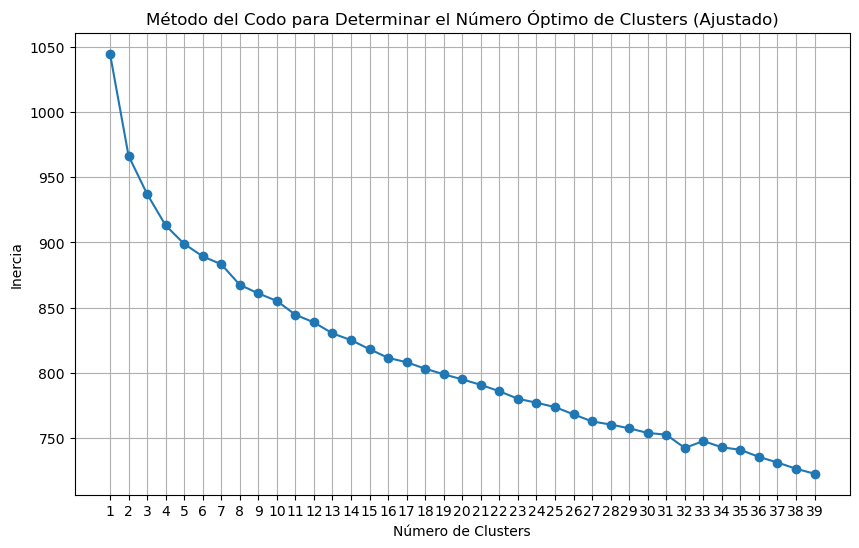

In [14]:
# Rango reducido de número de clusters a probar y simplificación del modelo K-Means
num_clusters_range = range(1, 40)  # Reducir el rango máximo de clusters
inertias = []

for k in num_clusters_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=100)
    kmeans_temp.fit(tfidf_matrix)
    inertias.append(kmeans_temp.inertia_)

# Visualización del método del codo (ajustado)
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, inertias, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters (Ajustado)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.xticks(num_clusters_range)
plt.grid(True)
plt.show()

## OJO 

Debo generara un proceso para ese manejo de nulos faltanes, algunos datos que son pocos lo puedeo hacer manualmente, para los de más datos debo revisar si es necesario recurruir a otra API para relizara su imputación o si uede uasar la medaiana delos ataos para completar la información faltante, es decir debo revisar columna por columna